## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  51.473000  1531.169366  0.701323  1.299963  1075.317208
1   4.599123  1465.177257  0.588046  9.352824   861.767301
2  13.163025  1098.716341  0.813764  5.810887   894.214815
3  57.427953   364.775948  0.882648  4.143771   327.102048
4   0.793124   648.524192  0.526731  7.185043   341.434335


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9876240	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9741871	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9648727	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9552236	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9419012	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9289976	total: 60ms	remaining: 9.94s
6:	learn: 0.9160006	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9046249	total: 61.1ms	remaining: 7.57s
8:	learn: 0.8911612	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8770039	total: 62ms	remaining: 6.13s
10:	learn: 0.8650731	total: 62.7ms	remaining: 5.63s
11:	learn: 0.8509834	total: 63.2ms	remaining: 5.2s
12:	learn: 0.8393705	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8275821	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8165718	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8069129	total: 65ms	remaining: 4s
16:	learn: 0.7967972	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7874764	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7791816	total: 66ms	remaining: 3.41s
19:	l

92:	learn: 0.3241190	total: 99ms	remaining: 966ms
93:	learn: 0.3203704	total: 99.6ms	remaining: 960ms
94:	learn: 0.3165043	total: 99.9ms	remaining: 952ms
95:	learn: 0.3137397	total: 100ms	remaining: 945ms
96:	learn: 0.3104059	total: 101ms	remaining: 938ms
97:	learn: 0.3077159	total: 101ms	remaining: 931ms
98:	learn: 0.3037989	total: 102ms	remaining: 925ms
99:	learn: 0.2998590	total: 102ms	remaining: 917ms
100:	learn: 0.2963676	total: 102ms	remaining: 911ms
101:	learn: 0.2929048	total: 103ms	remaining: 905ms
102:	learn: 0.2898605	total: 103ms	remaining: 901ms
103:	learn: 0.2871498	total: 104ms	remaining: 895ms
104:	learn: 0.2836231	total: 104ms	remaining: 888ms
105:	learn: 0.2808773	total: 105ms	remaining: 883ms
106:	learn: 0.2780144	total: 105ms	remaining: 875ms
107:	learn: 0.2743672	total: 106ms	remaining: 872ms
108:	learn: 0.2717897	total: 106ms	remaining: 867ms
109:	learn: 0.2689220	total: 106ms	remaining: 862ms
110:	learn: 0.2658195	total: 107ms	remaining: 856ms
111:	learn: 0.26223

272:	learn: 0.0668221	total: 183ms	remaining: 489ms
273:	learn: 0.0664180	total: 184ms	remaining: 488ms
274:	learn: 0.0660841	total: 185ms	remaining: 487ms
275:	learn: 0.0656229	total: 185ms	remaining: 486ms
276:	learn: 0.0651091	total: 186ms	remaining: 484ms
277:	learn: 0.0646767	total: 186ms	remaining: 483ms
278:	learn: 0.0642591	total: 187ms	remaining: 482ms
279:	learn: 0.0638345	total: 187ms	remaining: 482ms
280:	learn: 0.0633785	total: 188ms	remaining: 480ms
281:	learn: 0.0629334	total: 188ms	remaining: 479ms
282:	learn: 0.0624758	total: 188ms	remaining: 477ms
283:	learn: 0.0620286	total: 189ms	remaining: 476ms
284:	learn: 0.0616361	total: 189ms	remaining: 475ms
285:	learn: 0.0611559	total: 190ms	remaining: 474ms
286:	learn: 0.0606159	total: 190ms	remaining: 473ms
287:	learn: 0.0602580	total: 191ms	remaining: 471ms
288:	learn: 0.0598829	total: 191ms	remaining: 470ms
289:	learn: 0.0595199	total: 191ms	remaining: 469ms
290:	learn: 0.0591715	total: 192ms	remaining: 468ms
291:	learn: 

461:	learn: 0.0253361	total: 279ms	remaining: 325ms
462:	learn: 0.0252810	total: 279ms	remaining: 324ms
463:	learn: 0.0252097	total: 280ms	remaining: 323ms
464:	learn: 0.0250726	total: 280ms	remaining: 323ms
465:	learn: 0.0250125	total: 281ms	remaining: 322ms
466:	learn: 0.0249425	total: 281ms	remaining: 321ms
467:	learn: 0.0248799	total: 282ms	remaining: 320ms
468:	learn: 0.0248232	total: 282ms	remaining: 319ms
469:	learn: 0.0247544	total: 282ms	remaining: 319ms
470:	learn: 0.0246178	total: 283ms	remaining: 318ms
471:	learn: 0.0245545	total: 283ms	remaining: 317ms
472:	learn: 0.0244955	total: 284ms	remaining: 316ms
473:	learn: 0.0244411	total: 284ms	remaining: 315ms
474:	learn: 0.0243786	total: 285ms	remaining: 314ms
475:	learn: 0.0242423	total: 285ms	remaining: 314ms
476:	learn: 0.0240564	total: 285ms	remaining: 313ms
477:	learn: 0.0240019	total: 286ms	remaining: 312ms
478:	learn: 0.0239410	total: 287ms	remaining: 312ms
479:	learn: 0.0238914	total: 287ms	remaining: 311ms
480:	learn: 

674:	learn: 0.0126927	total: 362ms	remaining: 174ms
675:	learn: 0.0126744	total: 362ms	remaining: 174ms
676:	learn: 0.0126569	total: 363ms	remaining: 173ms
677:	learn: 0.0126068	total: 363ms	remaining: 172ms
678:	learn: 0.0125896	total: 363ms	remaining: 172ms
679:	learn: 0.0125156	total: 364ms	remaining: 171ms
680:	learn: 0.0124948	total: 364ms	remaining: 170ms
681:	learn: 0.0124271	total: 364ms	remaining: 170ms
682:	learn: 0.0123721	total: 365ms	remaining: 169ms
683:	learn: 0.0123531	total: 365ms	remaining: 169ms
684:	learn: 0.0123063	total: 365ms	remaining: 168ms
685:	learn: 0.0122810	total: 366ms	remaining: 167ms
686:	learn: 0.0122623	total: 366ms	remaining: 167ms
687:	learn: 0.0122082	total: 366ms	remaining: 166ms
688:	learn: 0.0121835	total: 367ms	remaining: 166ms
689:	learn: 0.0121649	total: 368ms	remaining: 165ms
690:	learn: 0.0121209	total: 368ms	remaining: 165ms
691:	learn: 0.0121036	total: 369ms	remaining: 164ms
692:	learn: 0.0120506	total: 369ms	remaining: 163ms
693:	learn: 

897:	learn: 0.0069658	total: 455ms	remaining: 51.7ms
898:	learn: 0.0069342	total: 456ms	remaining: 51.2ms
899:	learn: 0.0069051	total: 456ms	remaining: 50.7ms
900:	learn: 0.0068929	total: 456ms	remaining: 50.2ms
901:	learn: 0.0068809	total: 457ms	remaining: 49.6ms
902:	learn: 0.0068500	total: 457ms	remaining: 49.1ms
903:	learn: 0.0068229	total: 457ms	remaining: 48.6ms
904:	learn: 0.0068101	total: 458ms	remaining: 48ms
905:	learn: 0.0067652	total: 458ms	remaining: 47.5ms
906:	learn: 0.0067352	total: 458ms	remaining: 47ms
907:	learn: 0.0067072	total: 458ms	remaining: 46.4ms
908:	learn: 0.0066798	total: 459ms	remaining: 45.9ms
909:	learn: 0.0066508	total: 459ms	remaining: 45.4ms
910:	learn: 0.0066273	total: 459ms	remaining: 44.9ms
911:	learn: 0.0066171	total: 460ms	remaining: 44.4ms
912:	learn: 0.0065887	total: 460ms	remaining: 43.8ms
913:	learn: 0.0065787	total: 460ms	remaining: 43.3ms
914:	learn: 0.0065649	total: 461ms	remaining: 42.8ms
915:	learn: 0.0065370	total: 461ms	remaining: 42.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

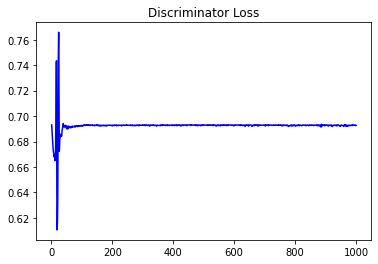

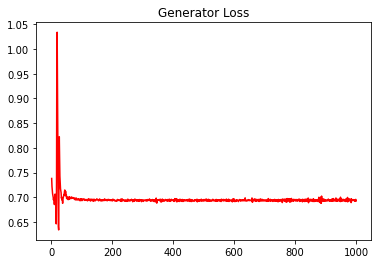

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.01161524285987579


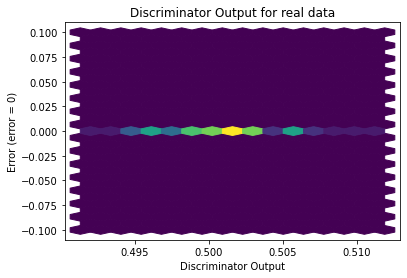

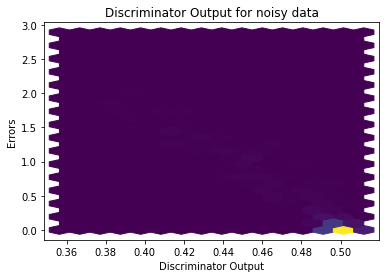

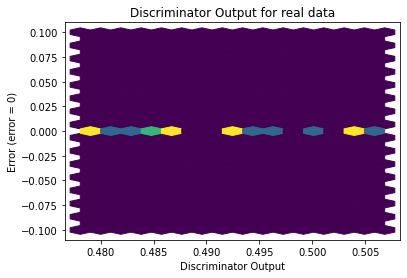

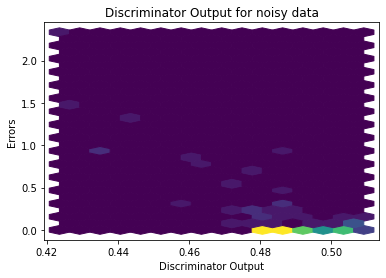

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


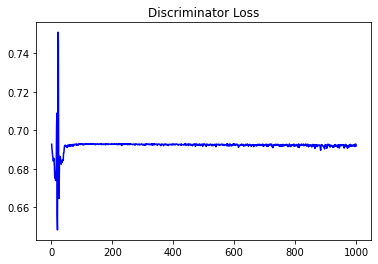

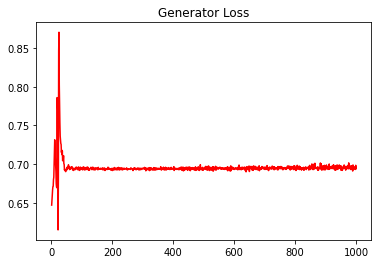

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.008887280259426356


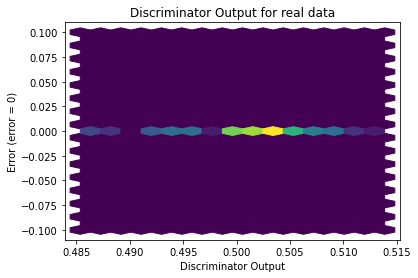

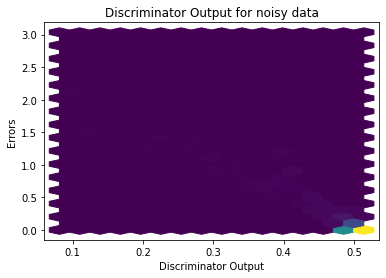

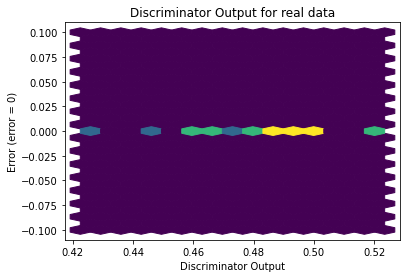

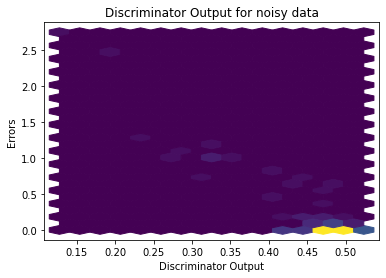

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7278]], requires_grad=True)
